In [89]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [90]:
df = pd.read_csv('Data/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Elimina los máximos

In [91]:
df = df[df.median_house_value != df.median_house_value.max()]

## Crea un modelo de regresión lineal simple usando el ingreso y calcula su R2

In [92]:
model_income = linear_model.LinearRegression()
X_income = df[['median_income']]
target = 'median_house_value'
y = df[target]
model_income.fit(X_income, y)
predictions_income = model_income.predict(X_income)
r2_score(y_pred=predictions_income, y_true=y)

0.41294861985820197

## Crea un modelo de regresión lineal simple usando la edad de las casas

In [93]:
model_age = linear_model.LinearRegression()
X_age = df[['housing_median_age']]
model_age.fit(X_age, y)
predictions_age = model_age.predict(X_age)
r2_score(y_pred=predictions_age, y_true=y)

0.004616870761556036

## Crea un modelo de regresión lineal multiple usando las variables anteriores

In [94]:
X_multiple = df[["housing_median_age", "median_income"]]
model_multiple = linear_model.LinearRegression()
model_multiple.fit(X_multiple, y)
predictions_multiple = model_multiple.predict(X_multiple)
r2_score(y_pred=predictions_multiple, y_true=y)

0.451713878373769

Escribe la ecuación del modelo

In [95]:
# Interepto
model_multiple.intercept_

-7997.527316095133

In [96]:
# Coeficientes
model_multiple.coef_

array([ 1567.97684924, 42420.02474575])

In [97]:
# Orden


$$Precio = \beta_0 + \beta_1 * x_1 + \beta_2* x_2$$

$$Precio = -7997 + 1567 * edad + 42420 * ingreso$$

### Agrega la variable de households

In [98]:
X_multiple2 = df[["housing_median_age", "median_income", "households"]]
model_multiple2 = linear_model.LinearRegression()
model_multiple2.fit(X_multiple2, y)
predictions_multiple2 = model_multiple2.predict(X_multiple2)
r2_score(y_pred=predictions_multiple2, y_true=y)

0.46916476561401843

Escribe la ecuación del modelo

In [99]:
model_multiple2.intercept_

-35840.773544186406

In [100]:
model_multiple2.coef_

array([1.90691959e+03, 4.25476800e+04, 3.54211223e+01])

### Agrega todas

In [101]:
### Verific los NA's
X = df.copy()
X = X.drop(target, axis=1)

X = pd.get_dummies(X)

X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,False,True,False


In [102]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        200
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [103]:
# Quita NA's 
X["total_bedrooms"] = X.total_bedrooms.fillna(X.total_bedrooms.mean())

In [104]:
# Convertir a one hot encoding 
model_todo = linear_model.LinearRegression().fit(X,y)
predicciones_todo = model_todo.predict(X)
r2_score(y_pred=predicciones_todo, y_true=y)

0.6119729299497512

In [105]:
coeficientes = pd.DataFrame({
     'names': X.keys(),
     'coeficientes': model_todo.coef_
})

coeficientes

,names,coeficientes
0,longitude,-24146.084691
1,latitude,-22299.970513
2,housing_median_age,911.724587
3,total_rooms,-5.867630
4,total_bedrooms,65.852744
5,population,-31.567024
6,households,68.208927
7,median_income,37911.255132
8,ocean_proximity_<1H OCEAN,-25430.859903
9,ocean_proximity_INLAND,-64411.683654


### Visualizando el modelo, calibracion

In [106]:
calibracion = pd.DataFrame({
     'predicciones': predicciones_todo,
     'real': y
})

In [107]:
calibracion['bins'] = pd.qcut(calibracion['predicciones'], q=10, labels=False)

grouped_calibracion = calibracion.groupby('bins').mean()

grouped_calibracion["error"] = (grouped_calibracion.predicciones - grouped_calibracion.real) / grouped_calibracion.predicciones

grouped_calibracion

,predicciones,real,error
bins,,,
0,64728.773042,83369.002541,-0.287974
1,108650.963322,109338.739197,-0.006330
2,137060.655146,130383.079268,0.048720
3,159810.781602,149374.529741,0.065304
4,182374.846474,170914.888211,0.062837
5,203225.674833,193673.664972,0.047002
6,223997.964243,218647.635994,0.023886
7,246050.033321,245296.544715,0.003062
8,272028.023621,278532.994408,-0.023913


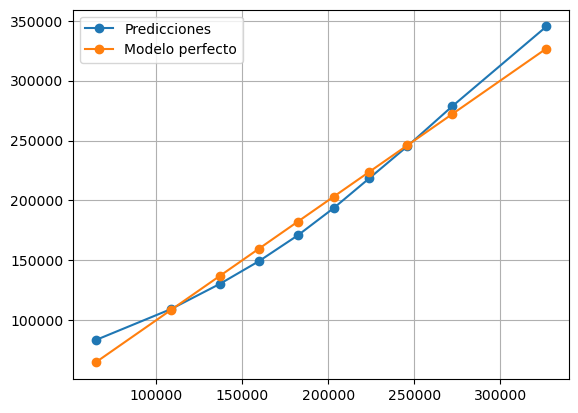

In [108]:
plt.plot(grouped_calibracion.predicciones.values, grouped_calibracion.real.values, marker='o', label="Predicciones")
plt.plot(grouped_calibracion.predicciones.values, grouped_calibracion.predicciones.values, marker='o', label="Modelo perfecto")
plt.legend()
plt.grid()


### Compara la calibración de todos los modelos anteriores